In [1]:
import os
import csv
import sys
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
sys.path.append('../src')
from fit_clinicalbert import split_train_val_test
import plot_helpers

In [3]:
modeltype = 'bestepoch'

In [4]:
grouped_results_file = f'../results/grouped-final-bydrug-CB_0-AR-30_222_24_10_1e-06_32_512.csv'
df = pd.read_csv(grouped_results_file, index_col=0)
df.shape

(4479, 7)

In [5]:
df['label'] = [1 if c == 'is_event' else 0 for c in df['class']]
valid = df[df['split']=='valid']
test = df[df['split']=='test']

In [6]:
roc_auc_score(valid['label'], valid['Pred1']), \
roc_auc_score(test['label'], test['Pred1'])

(0.8374483007265109, 0.835997874004572)

In [7]:
performance = dict()
performance['valid'] = dict()
performance['test'] = dict()

In [8]:
# Precision Recall Curve and Max F1
performance['valid'].update(
    plot_helpers.prdata(valid['label'], valid['Pred1'])
)
performance['test'].update(
    plot_helpers.prdata(test['label'], test['Pred1'], performance['valid']['max_f1_threshold'])
)

In [9]:
# Receiver Operating Characteristic Curve 

performance['valid'].update(
    plot_helpers.rocdata(valid['label'], valid['Pred1'], performance['valid']['max_f1_threshold'])
)
performance['test'].update(
    plot_helpers.rocdata(test['label'], test['Pred1'], performance['valid']['max_f1_threshold'])
)

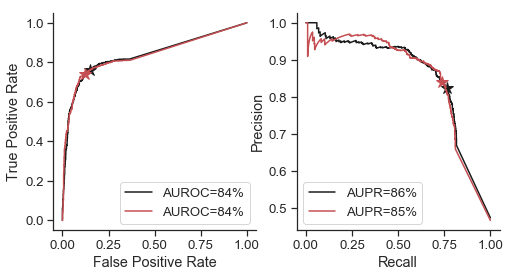

In [11]:
sns.set(style='ticks', font_scale=1.2)
plt.figure(figsize=(8,4))


plt.subplot(1,2,1)

data = performance['valid']
plt.plot(data['fpr'], data['tpr'], color='k', label='AUROC=%.0f%%' % (100*data['roc_auc']))
plt.plot([data['max_f1_fpr']], [data['max_f1_tpr']], '*', color='k', markersize=12)

data = performance['test']
plt.plot(data['fpr'], data['tpr'], color='r', label='AUROC=%.0f%%' % (100*data['roc_auc']))
plt.plot([data['max_f1_fpr']], [data['max_f1_tpr']], '*', color='r', markersize=12)

plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sns.despine()

plt.subplot(1,2,2)

data = performance['valid']
plt.plot(data['recall'], data['precision'], color='k', label='AUPR=%.0f%%' % (100*data['pr_auc']))
plt.plot([data['max_f1_recall']], [data['max_f1_precision']], '*', color='k', markersize=12)

data = performance['test']
plt.plot(data['recall'], data['precision'], color='r', label='AUPR=%.0f%%' % (100*data['pr_auc']))
plt.plot([data['max_f1_recall']], [data['max_f1_precision']], '*', color='r', markersize=12)

plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
sns.despine()

